In [1]:
import numpy as np
import pandas as pd

import itertools

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
titanic = pd.read_csv('../../data/titanic/titanic.csv')

titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [3]:
labels = titanic['Survived']
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], inplace=True, axis=1)
titanic.fillna(0, inplace=True)

# Conversion To Categorical Integers

This is in contrast to the previous workflow where we one-hot encoded the same data.

In [4]:
titanic.dtypes

Age         float64
Cabin        object
Embarked     object
Fare        float64
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
dtype: object

In [5]:
cabin_names = titanic['Cabin'].unique()
titanic['Cabin'] = titanic['Cabin'].replace(to_replace=cabin_names, value=range(cabin_names.shape[0]))

embarked_names = titanic['Embarked'].unique()
titanic['Embarked'] = titanic['Embarked'].replace(to_replace=embarked_names, value=range(embarked_names.shape[0]))

sex_names = titanic['Sex'].unique()
titanic['Sex'] = titanic['Sex'].replace(to_replace=sex_names, value=range(sex_names.shape[0]))

In [6]:
titanic.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,0,3,7.2500,0,3,0,1
1,38.0,1,1,71.2833,0,1,1,1
2,26.0,0,3,7.9250,0,3,1,0
3,35.0,2,3,53.1000,0,1,1,1
4,35.0,0,3,8.0500,0,3,0,0


# kmeans clustering

In [7]:
kmeans = KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(titanic)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters = kmeans.predict(titanic)

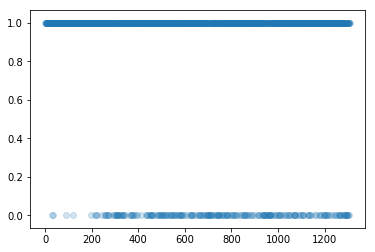

In [9]:
plt.scatter(range(len(clusters)),clusters, alpha=0.2)
plt.show()

In [10]:
clst_colors = []
true_colors = []

for i in range(labels.shape[0]):
    if labels[i] == 1:
        true_colors.append('green')
    else:
        true_colors.append('red')

for i in range(labels.shape[0]):
    if clusters[i] == 1:
        clst_colors.append('green')
    else:
        clst_colors.append('red')

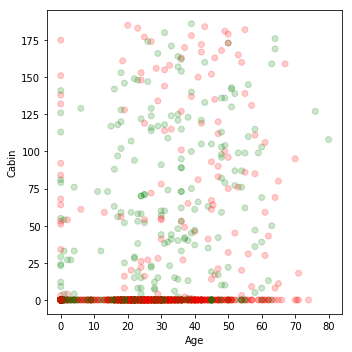

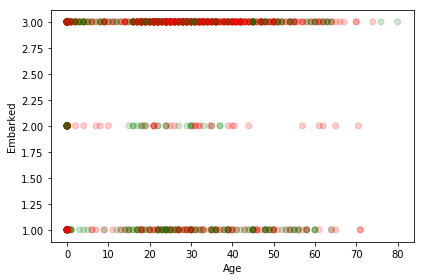

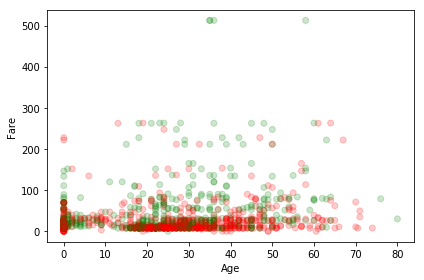

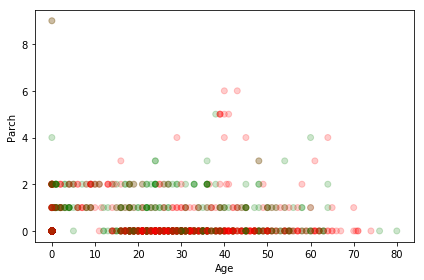

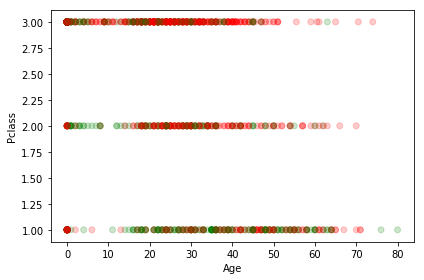

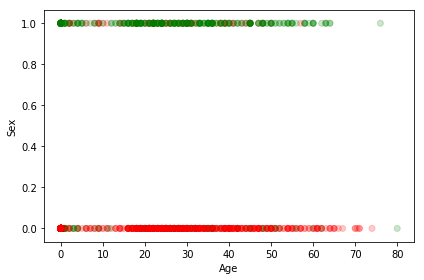

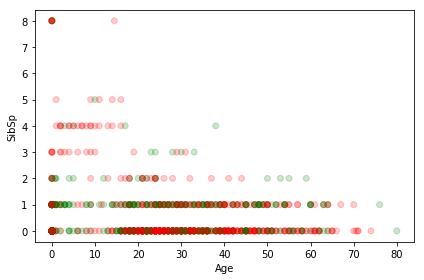

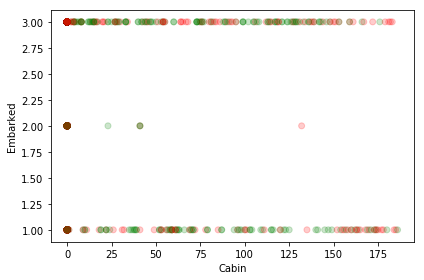

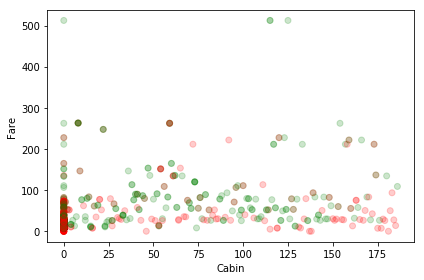

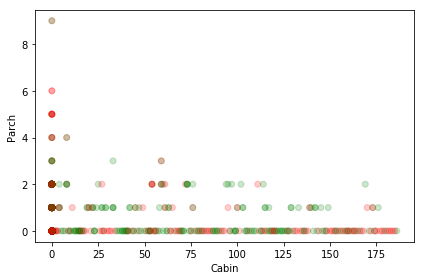

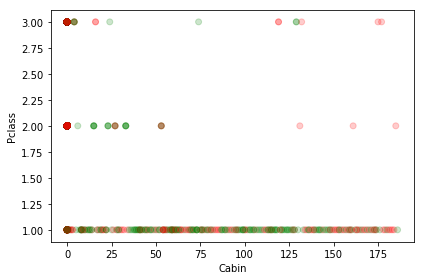

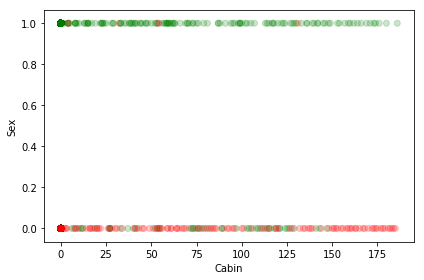

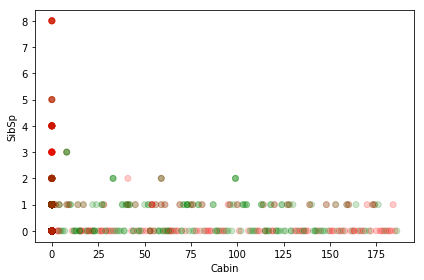

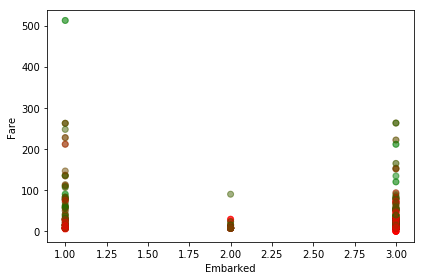

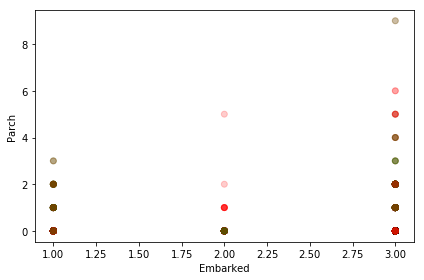

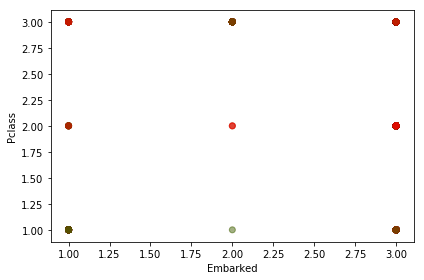

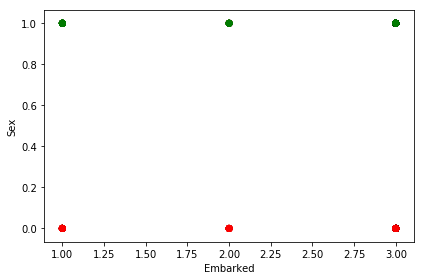

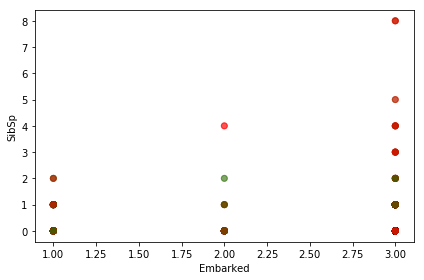

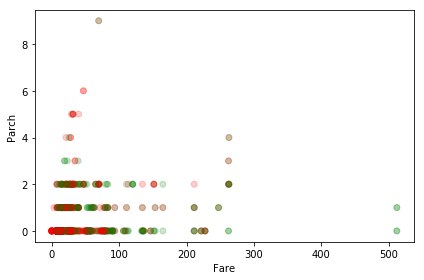

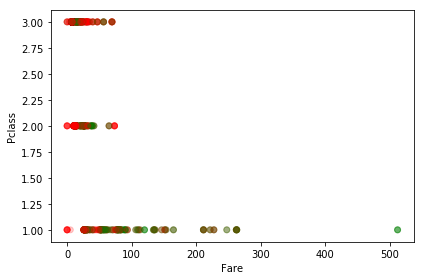

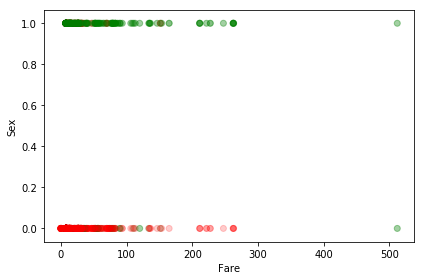

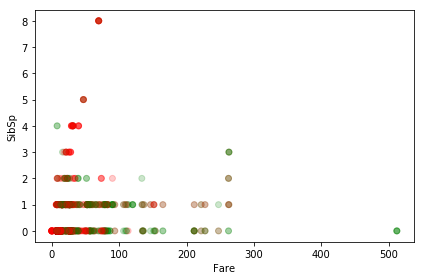

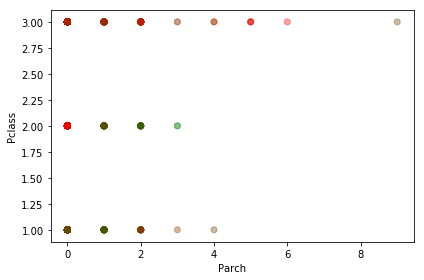

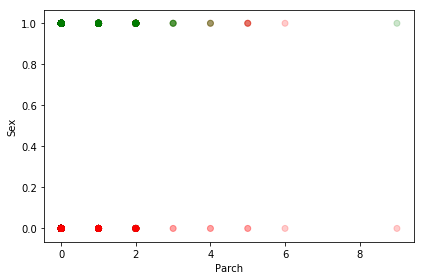

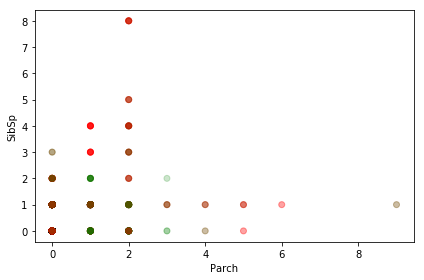

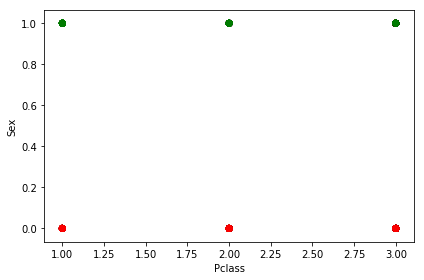

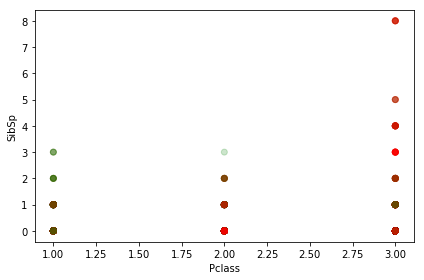

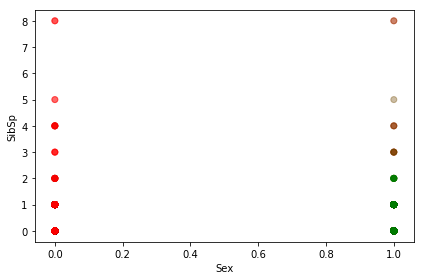

In [11]:
plt.figure(figsize=(5,5))

for i in itertools.combinations(titanic.columns, r=2):
    ax1, ax2 = i[0], i[1]
    
    plt.scatter(titanic[ax1], titanic[ax2], color=true_colors, alpha=0.2)
    
    plt.xlabel(ax1)
    plt.ylabel(ax2)
    
    plt.tight_layout()
    plt.show()

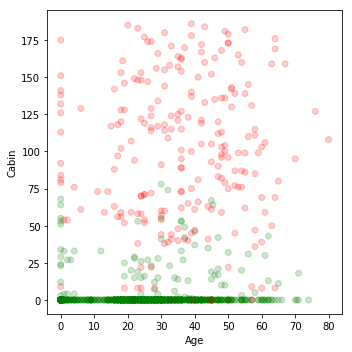

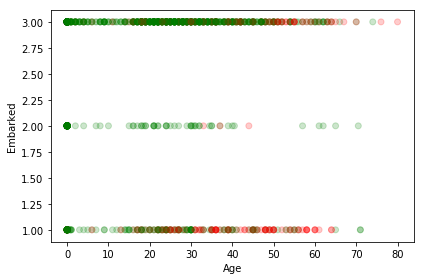

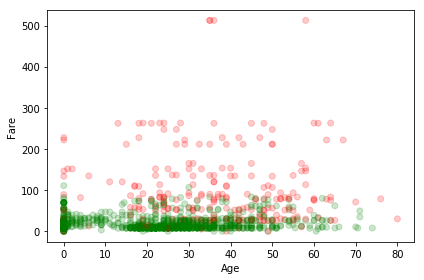

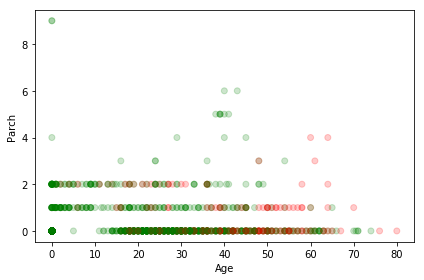

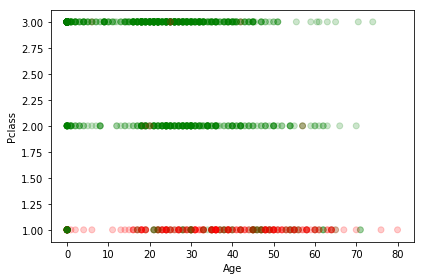

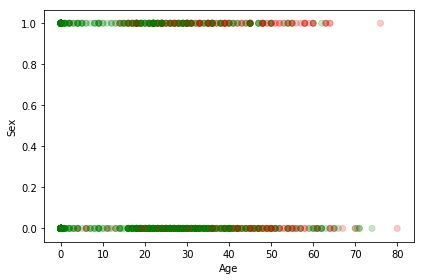

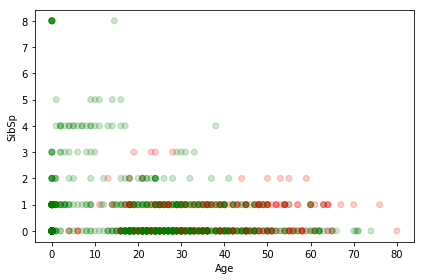

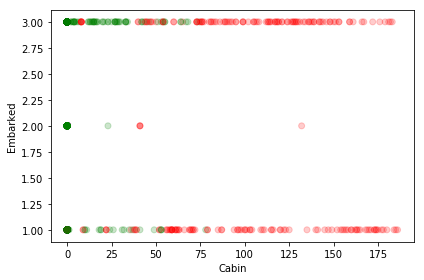

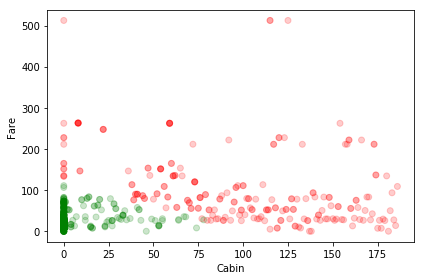

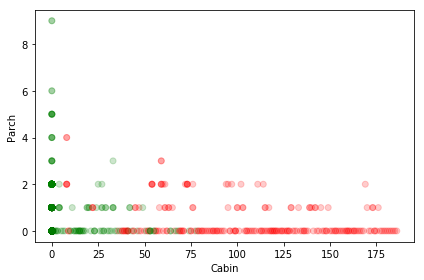

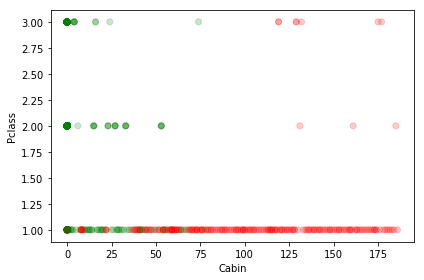

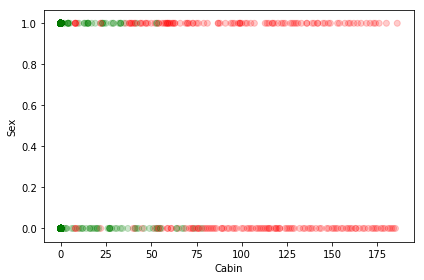

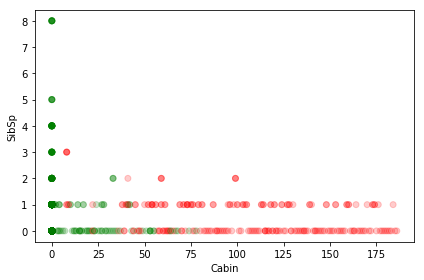

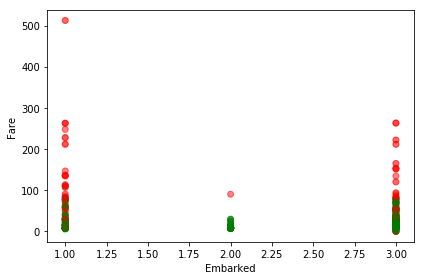

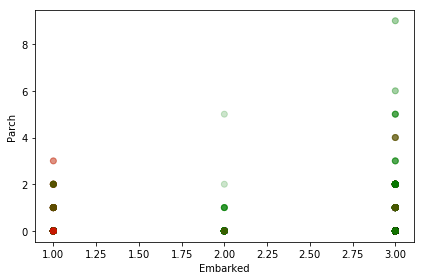

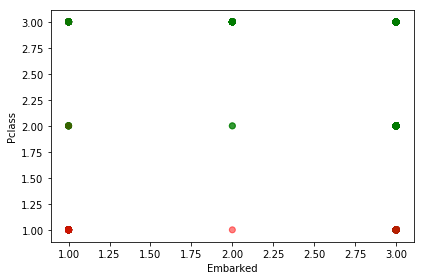

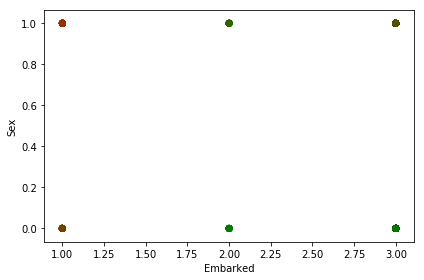

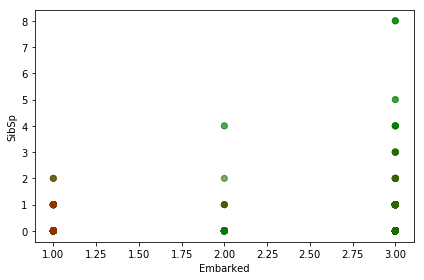

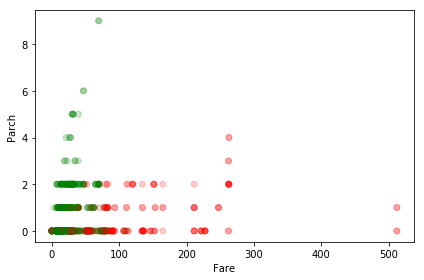

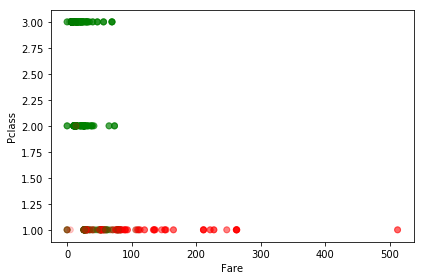

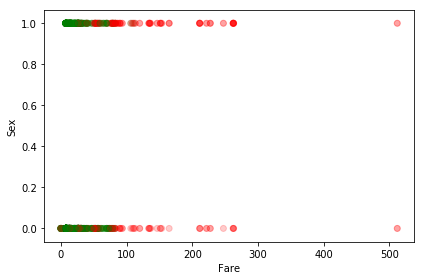

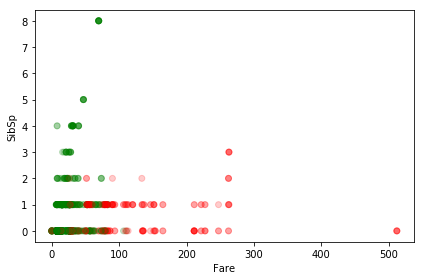

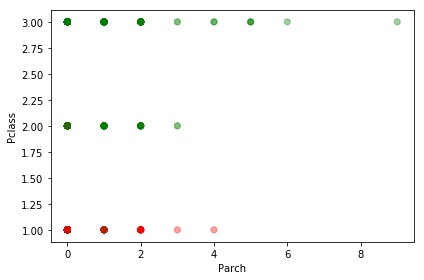

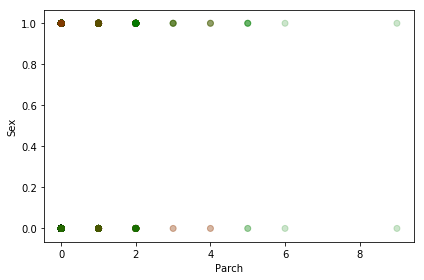

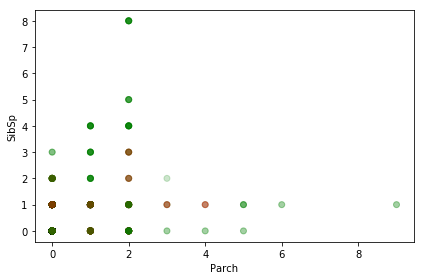

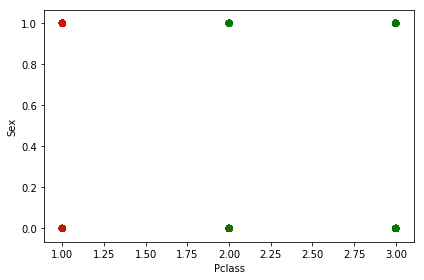

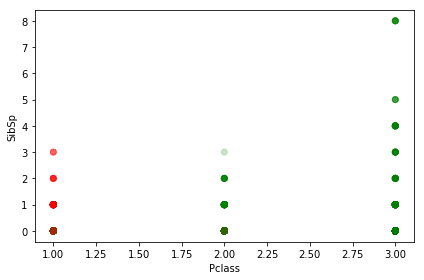

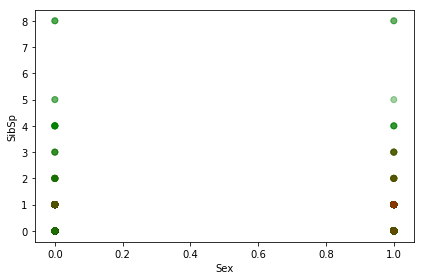

In [12]:
plt.figure(figsize=(5,5))

for i in itertools.combinations(titanic.columns, r=2):
    ax1, ax2 = i[0], i[1]
    
    plt.scatter(titanic[ax1], titanic[ax2], color=clst_colors, alpha=0.2)
    
    plt.xlabel(ax1)
    plt.ylabel(ax2)
    
    plt.tight_layout()
    plt.show()

### PCA with kmeans

In [13]:
pca = PCA(n_components=2)
pca.fit(titanic)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
transformed = pca.transform(titanic)

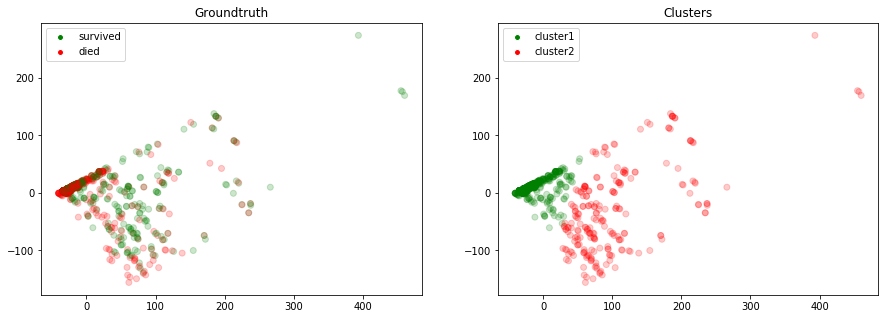

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.scatter(transformed[:,0], transformed[:,1], color=true_colors, alpha=0.2)
ax1.set_title('Groundtruth')
ax1.legend([Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='g'),
            Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='r')],
            ['survived', 'died'])


ax2.scatter(transformed[:,0], transformed[:,1], color=clst_colors, alpha=0.2)
ax2.set_title('Clusters')
ax2.legend([Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='g'),
            Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='r')],
            ['cluster1', 'cluster2'])

plt.show()

# DBSCAN

Density-Based Spatial Clustering of Applications with Noise

In [16]:
db = DBSCAN(eps=8, min_samples=30, n_jobs=-1)

In [17]:
clusters = db.fit_predict(titanic)

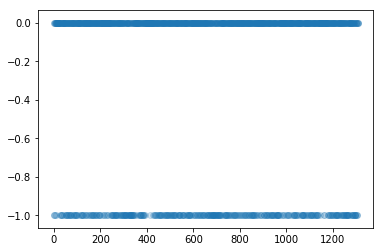

In [18]:
plt.scatter(range(len(clusters)),clusters, alpha=0.2)
plt.show()

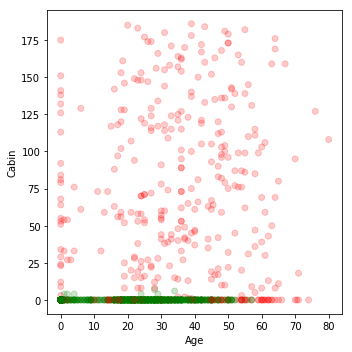

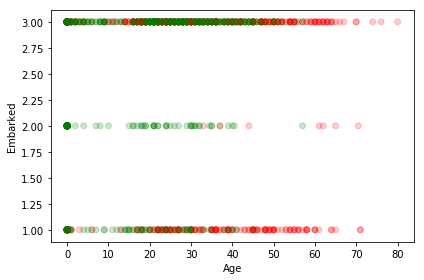

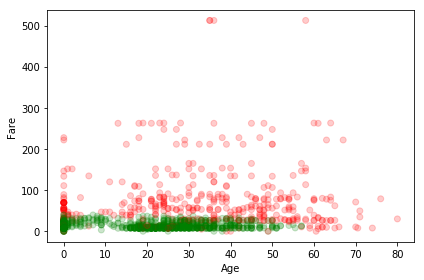

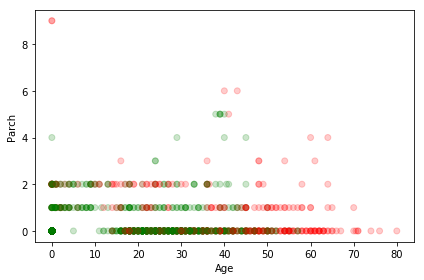

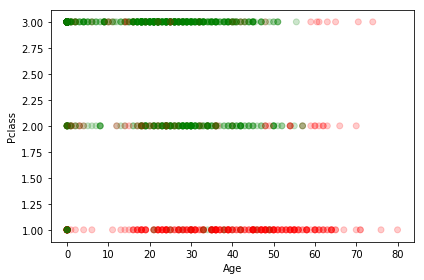

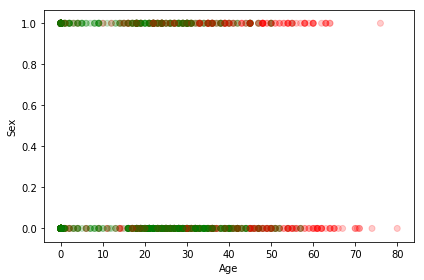

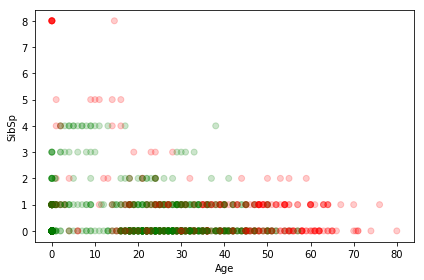

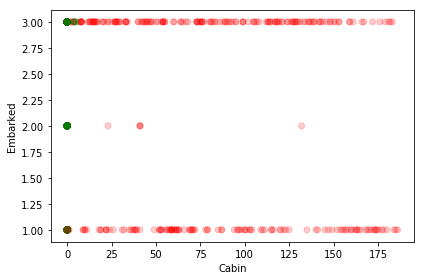

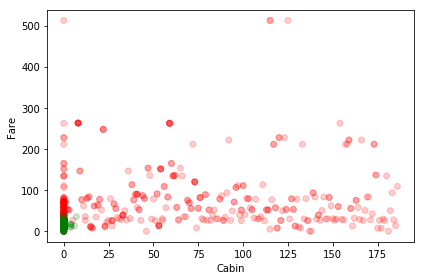

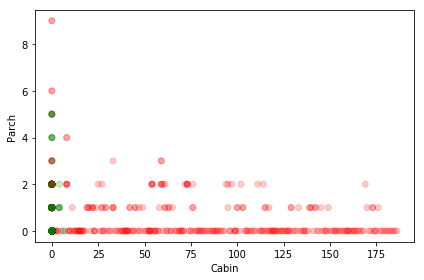

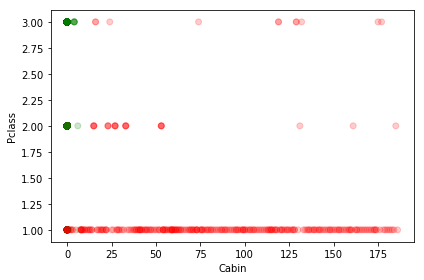

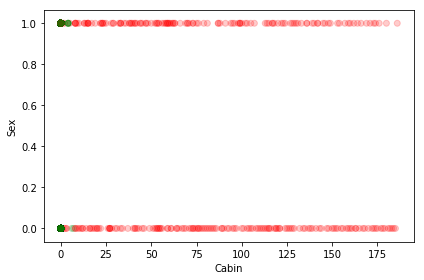

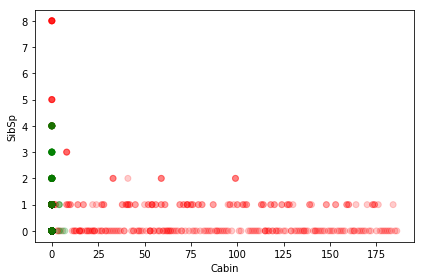

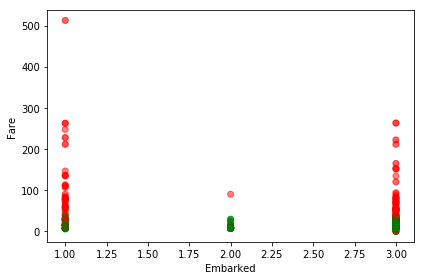

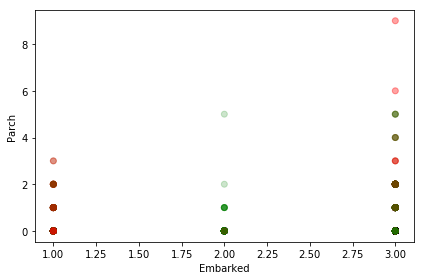

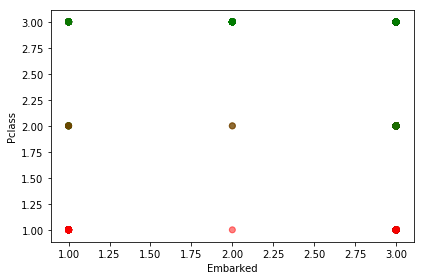

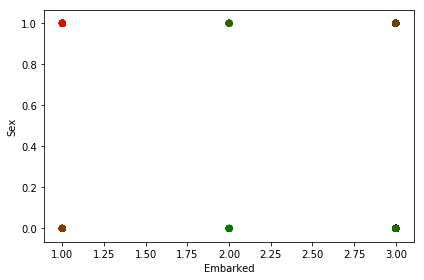

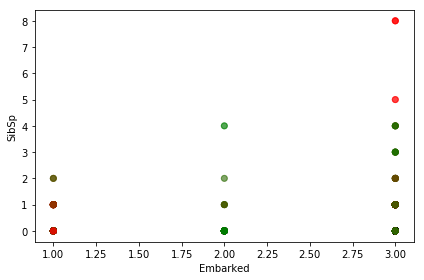

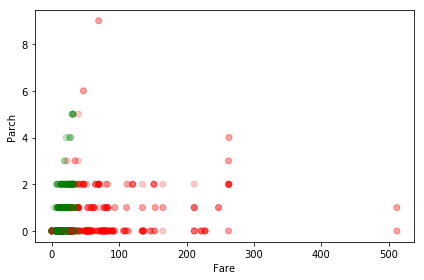

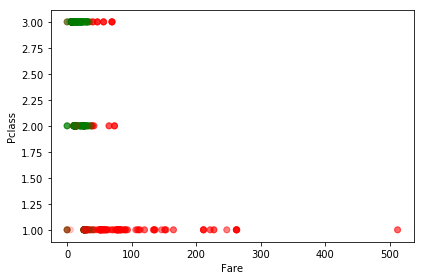

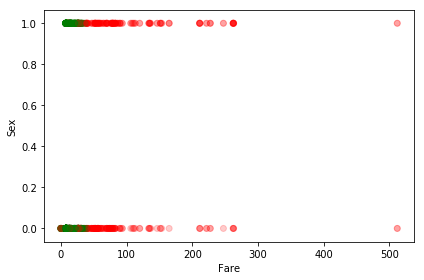

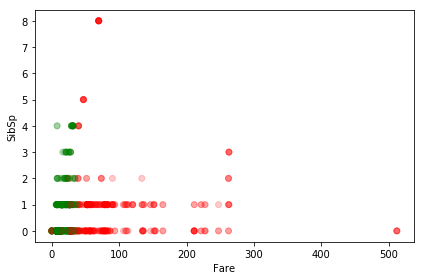

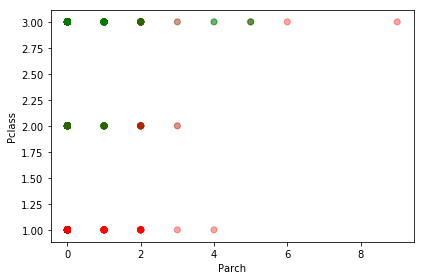

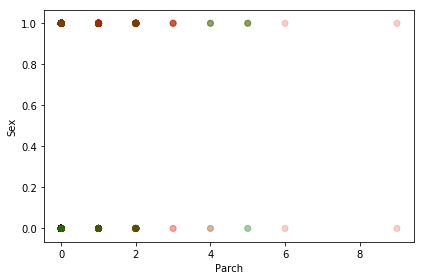

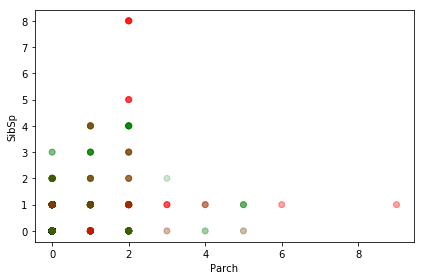

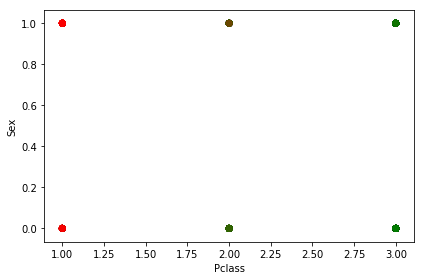

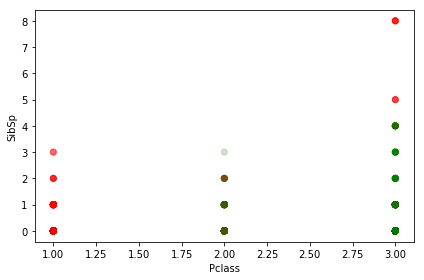

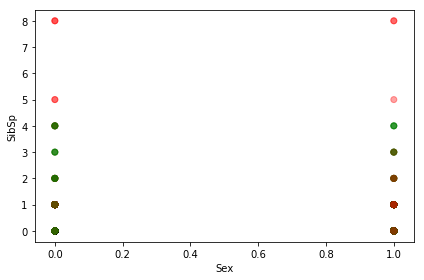

In [19]:
clst_colors = []

for i in range(labels.shape[0]):
    if clusters[i] == 0:
        clst_colors.append('green')
    else:
        clst_colors.append('red')
        
plt.figure(figsize=(5,5))

for i in itertools.combinations(titanic.columns, r=2):
    ax1, ax2 = i[0], i[1]
    
    plt.scatter(titanic[ax1], titanic[ax2], color=clst_colors, alpha=0.2)
    
    plt.xlabel(ax1)
    plt.ylabel(ax2)
    
    plt.tight_layout()
    plt.show()

### PCA with DBSCAN

In [20]:
pca = PCA(n_components=2)
pca.fit(titanic)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
transformed = pca.transform(titanic)

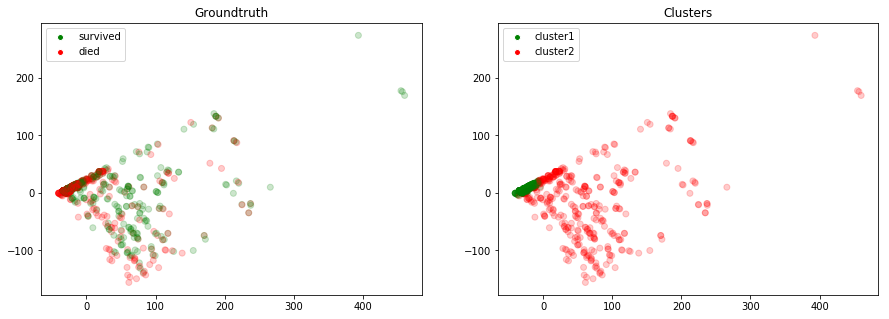

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.scatter(transformed[:,0], transformed[:,1], color=true_colors, alpha=0.2)
ax1.set_title('Groundtruth')
ax1.legend([Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='g'),
            Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='r')],
            ['survived', 'died'])


ax2.scatter(transformed[:,0], transformed[:,1], color=clst_colors, alpha=0.2)
ax2.set_title('Clusters')
ax2.legend([Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='g'),
            Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='r')],
            ['cluster1', 'cluster2'])

plt.show()